# Homework 4
## Comparing Investment Strategies

#### Students
Scott Vu - SMV210000

Philip Wallis - PTW190000

In [117]:
# Install the yfinance if not already installed
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [118]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [119]:
# Importing the dataset
#aapl_data = yf.download('AAPL', start='1990-01-01', end='2020-12-31')
aapl_data = pd.read_csv('aapl_data.csv')


In [120]:
aapl_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263414,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265181,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266066,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266950,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268718,101572800


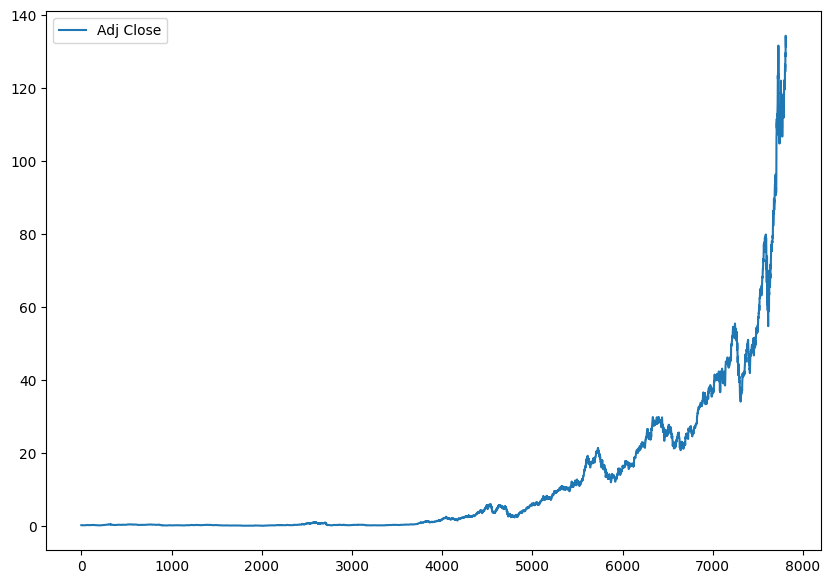

In [121]:
# Visualising the dataset
aapl_data['Adj Close'].plot(figsize=(10, 7))
plt.legend()
plt.show()

In [122]:
# Part 1: Buy and Hold Strategy

# Calculate the number of shares purchased each month with $1000
# Using 'Adjusted Close' price for this purpose
aapl_data['Shares_Purchased'] = 1000 / aapl_data['Adj Close']

# Group the data by year and month to get the monthly data
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])
aapl_data['YearMonth'] = aapl_data['Date'].dt.to_period('M')
monthly_data = aapl_data.groupby('YearMonth').first()

# Sum up all the shares purchased over the 30-year period
total_shares = monthly_data['Shares_Purchased'].sum()

# Get the 'Adjusted Close' price at the end of 2020
closest_end_date = aapl_data[aapl_data['Date'] <= '2020-12-31']['Date'].max()
final_price_closest_date = aapl_data[aapl_data['Date'] == closest_end_date]['Adj Close'].values[0]


# Calculate the final value of the investment using the closest date
final_value_closest_date = total_shares * final_price_closest_date

print('Total investment: ', '${:,.2f}'.format(1000 * 12 * 30))
print('Total Shares Purchased: ', total_shares)

# Format the final value to 2 decimal places and xxx,xxx,xxx.xx format
print('Final Value: ', '${:,.2f}'.format(final_value_closest_date))

Total investment:  $360,000.00
Total Shares Purchased:  691989.3486339333
Final Value:  $90,926,973.83


In [123]:
# Part 2: Active Trading Strategy

# Calculate the 50-day Simple Moving Average (SMA)
sma_period = 50
aapl_data['50d_SMA'] = aapl_data['Adj Close'].rolling(window=sma_period).mean()

# We use the last available SMA value for each month as the reference for that month's investment decision
monthly_sma = aapl_data.groupby('YearMonth')['50d_SMA'].last()
monthly_data = monthly_data.join(monthly_sma)

# Determine the monthly investment decision based on the adjusted SMA data
monthly_data['Invest_AAPL'] = monthly_data['Adj Close'] > monthly_data['50d_SMA']

# Calculate the investment in AAPL and in Savings
monthly_data['Investment_AAPL'] = monthly_data['Invest_AAPL'] * 1000 / monthly_data['Adj Close']
monthly_data['Investment_Savings'] = (~monthly_data['Invest_AAPL']) * 1000

# Sum up the total investment in AAPL and Savings
total_investment_aapl = monthly_data['Investment_AAPL'].sum()
total_investment_savings = monthly_data['Investment_Savings'].sum()

# Calculate the final value of AAPL investment
final_value_aapl = total_investment_aapl * final_price_closest_date

final_value_aapl, total_investment_savings, final_value_aapl + total_investment_savings

print('Total Investment in AAPL: ', '${:,.2f}'.format(total_investment_aapl))
print('Total Investment in Savings: ', '${:,.2f}'.format(total_investment_savings))
print('Final Value: ', '${:,.2f}'.format(final_value_aapl + total_investment_savings))


Total Investment in AAPL:  $298,763.79
Total Investment in Savings:  $173,000.00
Final Value:  $39,430,378.18


In [124]:
# Calculate the total return for each strategy after 30 years
total_return_original = final_value_closest_date / (1000 * 12 * 30)
total_return_active = (final_value_aapl + total_investment_savings) / (1000 * 12 * 30)

print('Total Return for Buy and Hold Strategy: ', '{:.2%}'.format(total_return_original))
print('Total Return for Active Trading Strategy: ', '{:.2%}'.format(total_return_active))



Total Return for Buy and Hold Strategy:  25257.49%
Total Return for Active Trading Strategy:  10952.88%


In [128]:
# Calculate the Anual Percentage Return (APR) for each strategy
# We assume the risk-free rate is 0% for this exercise

risk_free_rate = 0
avg_apr_original = (total_return_original + 1) ** (1/30) - 1
avg_apr_active = (total_return_active + 1) ** (1/30) - 1

print('Annual Percentage Return for Buy and Hold Strategy: ', '{:.2%}'.format(avg_apr_original))
print('Annual Percentage Return for Active Trading Strategy: ', '{:.2%}'.format(avg_apr_active))

Annual Percentage Return for Buy and Hold Strategy:  20.26%
Annual Percentage Return for Active Trading Strategy:  16.98%


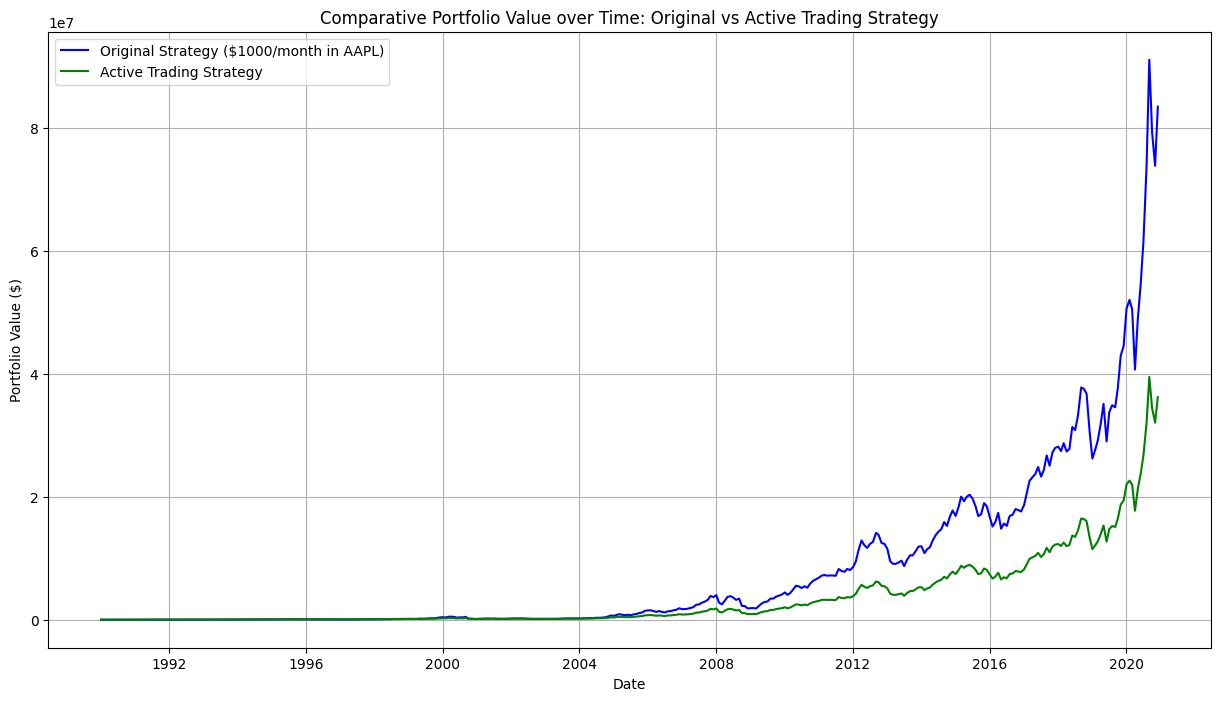

In [125]:
# A Plot showing the Growth of your money using both the strategies

merged_data = pd.merge(monthly_data, monthly_sma, on='YearMonth', how='left', suffixes=('', '_sma'))

# Calculate the cumulative investment in AAPL and Savings over time
merged_data['Cumulative_AAPL'] = merged_data['Investment_AAPL'].cumsum() * merged_data['Adj Close']
merged_data['Cumulative_Savings'] = merged_data['Investment_Savings'].cumsum()

# Calculate the cumulative value for the original strategy
monthly_data['Cumulative_Original'] = monthly_data['Shares_Purchased'].cumsum() * monthly_data['Adj Close']

# Plotting the results
plt.figure(figsize=(15, 8))

# Plotting the original strategy
plt.plot(monthly_data['Date'], monthly_data['Cumulative_Original'], label='Original Strategy ($1000/month in AAPL)', color='blue')

# Plotting the active trading strategy
plt.plot(merged_data['Date'], merged_data['Cumulative_AAPL'] + merged_data['Cumulative_Savings'], label='Active Trading Strategy', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Comparative Portfolio Value over Time: Original vs Active Trading Strategy')
plt.legend()
plt.grid(True)

# Show the Plot
plt.show()